In [21]:
import numpy as np
import pickle
import random
from tqdm import tqdm
rng = np.random.RandomState(112313)
# from scipy.stats import uniform
# from scipy.optimize import minimize
# from scipy.optimize import minimize_scalar
from matplotlib import rcParams, pyplot as plt
import matplotlib.ticker as mtick
from tqdm.notebook import tqdm
from math import floor, ceil, sqrt, pi
from time import time
from itertools import combinations
import pandas as pd
import seaborn as sns
# from sklearn.decomposition import PCA
from collections import Counter
from collections import defaultdict
import copy
from string import ascii_uppercase as auc
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.path.expanduser('~/.kaggle/')
from skimage import io
import matplotlib.pyplot as plt
#import jpegio as jio
from imageio.v2 import imread
import numpy as np
import matplotlib.pyplot as plt

In [39]:
def load_image(image_path):
    return imread(image_path, mode='L').astype(int)

def compute_pdh(image):
    diffs = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1] - 1):
            diff = image[i, j] - image[i, j+1]
            diffs.extend([diff, -diff])

    for i in range(image.shape[0] - 1):
        for j in range(image.shape[1]):
            diff = image[i, j] - image[i + 1, j]
            diffs.extend([diff, -diff])

    return np.array(diffs)

def calculate_f_statistic(diffs):
    if diffs.size == 0:
        return None

    hist_range = (np.min(diffs), np.max(diffs) + 1)
    hist, bin_edges = np.histogram(diffs, bins=50, range=hist_range)

    obs_freq = hist
    exp_freq = (hist + hist[::-1]) / 2

    epsilon = 1e-10
    f_value = np.sum((obs_freq - exp_freq) ** 2 / (exp_freq + epsilon))
    return f_value

def analyze_images(cover_path, stego_path):
    cover_image = load_image(cover_path)
    stego_image = load_image(stego_path)

    cover_diffs = compute_pdh(cover_image)
    stego_diffs = compute_pdh(stego_image)

    cover_f_value = calculate_f_statistic(cover_diffs)
    stego_f_value = calculate_f_statistic(stego_diffs)

    print(f"Cover F Value: {cover_f_value}")
    print(f"Stego F Value: {stego_f_value}")

    if cover_f_value is not None and stego_f_value is not None:
        if cover_f_value > stego_f_value:
            print("Analysis Correct: Cover is greater than Stego.")
        else:
            print("Analysis Incorrect: Stego is greater than or equal to Cover.")

cover_image_path = 'dataset1\\boss_256_0.4_test\\cover\\9010.png'
stego_image_path = 'dataset1\\boss_256_0.4_test\\bossbase_test\\9010.png'
analyze_images(cover_image_path, stego_image_path)


Cover F Value: 9273.70857732894
Stego F Value: 9029.210187049628
Analysis Correct: Cover is greater than Stego.


In [18]:
from imageio.v2 import imread
import numpy as np
import matplotlib.pyplot as plt

def load_image(image_path):
    return imread(image_path, mode='L').astype(int)

def compute_pdh(image):
    diffs = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1] - 1):
            diff = image[i, j] - image[i, j+1]
            diffs.extend([diff, -diff])

    for i in range(image.shape[0] - 1):
        for j in range(image.shape[1]):
            diff = image[i, j] - image[i + 1, j]
            diffs.extend([diff, -diff])

    return np.array(diffs)

def calculate_f_statistic(diffs):
    if diffs.size == 0:
        return None

    hist_range = (np.min(diffs), np.max(diffs) + 1)
    hist, bin_edges = np.histogram(diffs, bins=50, range=hist_range)

    obs_freq = hist
    exp_freq = (hist + hist[::-1]) / 2

    epsilon = 1e-10
    f_value = np.sum((obs_freq - exp_freq) ** 2 / (exp_freq + epsilon))
    return f_value

def analyze_images(cover_path, stego_path):
    cover_image = load_image(cover_path)
    stego_image = load_image(stego_path)

    cover_diffs = compute_pdh(cover_image)
    stego_diffs = compute_pdh(stego_image)

    cover_f_value = calculate_f_statistic(cover_diffs)
    stego_f_value = calculate_f_statistic(stego_diffs)

    print(f"Cover F Value: {cover_f_value}")
    print(f"Stego F Value: {stego_f_value}")

    results = {
        'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0
    }

    if cover_f_value > stego_f_value:
        results['TN'] += 1  # True Negative: Cover correctly identified with higher F value
        results['TP'] += 1  # True Positive: Stego correctly identified with lower F value
    else:
        results['FN'] += 1  # False Negative: Cover misidentified (lower F value)
        results['FP'] += 1  # False Positive: Stego misidentified (higher F value)

    print("Results:", results)

# Example usage:
cover_image_path = 'C:\\Users\\Dupuju\\Downloads\\steganalysis\\Stego-pvd-dataset\\test\\cleanTest\\06000.png'
stego_image_path = 'C:\\Users\\Dupuju\\Downloads\\steganalysis\\Stego-pvd-dataset\\test\\stegoTest\\06000x.png'
analyze_images(cover_image_path, stego_image_path)


Cover F Value: 1015206.8265032987
Stego F Value: 946237.5034470992
Results: {'TP': 1, 'TN': 1, 'FP': 0, 'FN': 0}


In [40]:
from imageio.v2 import imread
import numpy as np
import os
from tqdm import tqdm

def load_image(image_path):
    return imread(image_path, mode='L').astype(int)

def compute_pdh(image):
    diffs = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1] - 1):
            diff = image[i, j] - image[i, j+1]
            diffs.extend([diff, -diff])
    for i in range(image.shape[0] - 1):
        for j in range(image.shape[1]):
            diff = image[i, j] - image[i + 1, j]
            diffs.extend([diff, -diff])
    return np.array(diffs)

def calculate_f_statistic(diffs):
    if diffs.size == 0:
        return None
    hist_range = (np.min(diffs), np.max(diffs) + 1)
    hist, bin_edges = np.histogram(diffs, bins=50, range=hist_range)
    obs_freq = hist
    exp_freq = (hist + hist[::-1]) / 2
    epsilon = 1e-10
    f_value = np.sum((obs_freq - exp_freq) ** 2 / (exp_freq + epsilon))
    return f_value

def analyze_images(cover_dir, stego_dir):
    results = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}

    for i in tqdm(range(4001, 5001)):
        cover_path = os.path.join(cover_dir, f'0{i:03}.png')
        stego_path = os.path.join(stego_dir, f'0{i:03}x.png')

        cover_image = load_image(cover_path)
        stego_image = load_image(stego_path)

        cover_diffs = compute_pdh(cover_image)
        stego_diffs = compute_pdh(stego_image)

        cover_f_value = calculate_f_statistic(cover_diffs)
        stego_f_value = calculate_f_statistic(stego_diffs)

        if cover_f_value > stego_f_value:
            results['TN'] += 1  # True Negative
            results['TP'] += 1  # True Positive
        else:
            results['FN'] += 1  # False Negative
            results['FP'] += 1  # False Positive

    print("Final Results:", results)

cover_directory = 'Stego-pvd-dataset\\test\\cleanTest'
stego_directory = 'Stego-pvd-dataset\\test\\stegoTest'
analyze_images(cover_directory, stego_directory)


 29%|██▉       | 290/1000 [02:54<07:07,  1.66it/s]


KeyboardInterrupt: 

Performance validation

In [43]:
from imageio.v2 import imread
import numpy as np
import os

def load_image(image_path):
    return imread(image_path, mode='L').astype(int)

def compute_pdh(image):
    diffs = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1] - 1):
            diff = image[i, j] - image[i, j+1]
            diffs.extend([diff, -diff])

    for i in range(image.shape[0] - 1):
        for j in range(image.shape[1]):
            diff = image[i, j] - image[i + 1, j]
            diffs.extend([diff, -diff])

    return np.array(diffs)

def calculate_f_statistic(diffs):
    if diffs.size == 0:
        return None

    hist_range = (np.min(diffs), np.max(diffs) + 1)
    hist, bin_edges = np.histogram(diffs, bins=50, range=hist_range)

    obs_freq = hist
    exp_freq = (hist + hist[::-1]) / 2

    epsilon = 1e-10
    f_value = np.sum((obs_freq - exp_freq) ** 2 / (exp_freq + epsilon))
    return f_value

def analyze_images(base_path, cover_dir, stego_dir):
    results = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    
    for i in tqdm(range(6001, 7001)):
        cover_path = os.path.join(base_path, cover_dir, f"0{i:3}.png")
        stego_path = os.path.join(base_path, stego_dir, f"0{i:3}x.png")
        
        cover_image = load_image(cover_path)
        stego_image = load_image(stego_path)

        cover_diffs = compute_pdh(cover_image)
        stego_diffs = compute_pdh(stego_image)

        cover_f_value = calculate_f_statistic(cover_diffs)
        stego_f_value = calculate_f_statistic(stego_diffs)

        if cover_f_value > stego_f_value:
            results['TN'] += 1
            results['TP'] += 1
        else:
            results['FN'] += 1
            results['FP'] += 1

    return results

def compute_metrics(results):
    TP, TN, FP, FN = results['TP'], results['TN'], results['FP'], results['FN']
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    Accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    
    return {
        'FPR': FPR,
        'TPR': TPR,
        'Precision': Precision,
        'Recall': Recall,
        'Accuracy': Accuracy
    }


base_path = 'C:\\Users\\Dupuju\\Downloads\\steganalysis\\Stego-pvd-dataset\\train'
cover_dir = 'cleanTrain'
stego_dir = 'stegoTrain'
#num_images = 1000

results = analyze_images(base_path, cover_dir, stego_dir)
metrics = compute_metrics(results)
print("Metrics:", metrics)


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [09:24<00:00,  1.77it/s]

Metrics: {'FPR': 0.01, 'TPR': 0.99, 'Precision': 0.99, 'Recall': 0.99, 'Accuracy': 0.99}


In [44]:
from imageio.v2 import imread
import numpy as np
import os

def load_image(image_path):
    return imread(image_path, mode='L').astype(int)

def compute_pdh(image):
    diffs = []
    for i in range(image.shape[0]):
        for j in range(image.shape[1] - 1):
            diff = image[i, j] - image[i, j+1]
            diffs.extend([diff, -diff])

    for i in range(image.shape[0] - 1):
        for j in range(image.shape[1]):
            diff = image[i, j] - image[i + 1, j]
            diffs.extend([diff, -diff])

    return np.array(diffs)

def calculate_f_statistic(diffs):
    if diffs.size == 0:
        return None

    hist_range = (np.min(diffs), np.max(diffs) + 1)
    hist, bin_edges = np.histogram(diffs, bins=50, range=hist_range)

    obs_freq = hist
    exp_freq = (hist + hist[::-1]) / 2

    epsilon = 1e-10
    f_value = np.sum((obs_freq - exp_freq) ** 2 / (exp_freq + epsilon))
    return f_value

def analyze_images(base_path, cover_dir, stego_dir, num_images):
    results = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    errors = {'FP': [], 'FN': []}

    for i in tqdm(range(1, num_images + 1)):
        cover_path = os.path.join(base_path, cover_dir, f"{i}.png")
        stego_path = os.path.join(base_path, stego_dir, f"{i}.png")

        cover_image = load_image(cover_path)
        stego_image = load_image(stego_path)

        cover_diffs = compute_pdh(cover_image)
        stego_diffs = compute_pdh(stego_image)

        cover_f_value = calculate_f_statistic(cover_diffs)
        stego_f_value = calculate_f_statistic(stego_diffs)

        if cover_f_value > stego_f_value:
            results['TN'] += 1
            results['TP'] += 1
        else:
            results['FN'] += 1
            results['FP'] += 1
            errors['FP'].append(stego_path)
            errors['FN'].append(cover_path)

    return results, errors

def compute_metrics(results):
    TP, TN, FP, FN = results['TP'], results['TN'], results['FP'], results['FN']
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    Accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    
    return {
        'FPR': FPR,
        'TPR': TPR,
        'Precision': Precision,
        'Recall': Recall,
        'Accuracy': Accuracy
    }

# Example usage
base_path = 'dataset1\\boss_256_0.4_train'
cover_dir = 'dataset1\\boss_256_0.4_train\\cover'
stego_dir = 'dataset1\\boss_256_0.4_train\\stego'
num_images = 100

results, errors = analyze_images(base_path, cover_dir, stego_dir, num_images)
metrics = compute_metrics(results)
print("Metrics:", metrics)
print("False Positives:", errors['FP'])
print("False Negatives:", errors['FN'])


  0%|          | 0/100 [00:00<?, ?it/s]

FileNotFoundError: No such file: 'c:\Users\Dupuju\Downloads\steganalysis\dataset1\boss_256_0.4_train\dataset1\boss_256_0.4_train\cover\1.png'

In [17]:
from imageio.v2 import imread
import numpy as np
import os

def load_image(image_path):
    try:
        return imread(image_path, mode='L').astype(int)
    except FileNotFoundError:
        print(f"File not found: {image_path}")
        return None

def compute_pdh(image):
    diffs = []
    if image is not None:
        for i in range(image.shape[0]):
            for j in range(image.shape[1] - 1):
                diff = image[i, j] - image[i, j+1]
                diffs.extend([diff, -diff])

        for i in range(image.shape[0] - 1):
            for j in range(image.shape[1]):
                diff = image[i, j] - image[i + 1, j]
                diffs.extend([diff, -diff])

    return np.array(diffs)

def calculate_f_statistic(diffs):
    if diffs.size == 0:
        return None

    hist_range = (np.min(diffs), np.max(diffs) + 1)
    hist, bin_edges = np.histogram(diffs, bins=50, range=hist_range)

    obs_freq = hist
    exp_freq = (hist + hist[::-1]) / 2

    epsilon = 1e-10
    f_value = np.sum((obs_freq - exp_freq) ** 2 / (exp_freq + epsilon))
    return f_value

def analyze_images(base_path, cover_dir, stego_dir, num_images):
    results = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}
    errors = {'FP': [], 'FN': [], 'Missing Files': []}

    for i in tqdm(range(1, num_images + 1)):
        cover_path = os.path.join(base_path, cover_dir, f"{i}.pgm")
        stego_path = os.path.join(base_path, stego_dir, f"{i}.pgm")

        cover_image = load_image(cover_path)
        stego_image = load_image(stego_path)

        if cover_image is None or stego_image is None:
            errors['Missing Files'].extend([cover_path, stego_path])
            continue  # Skip this pair if either image is missing

        cover_diffs = compute_pdh(cover_image)
        stego_diffs = compute_pdh(stego_image)

        cover_f_value = calculate_f_statistic(cover_diffs)
        stego_f_value = calculate_f_statistic(stego_diffs)

        if cover_f_value > stego_f_value:
            results['TN'] += 1
            results['TP'] += 1
        else:
            results['FN'] += 1
            results['FP'] += 1
            errors['FP'].append(stego_path)
            errors['FN'].append(cover_path)

    return results, errors

def compute_metrics(results):
    TP, TN, FP, FN = results['TP'], results['TN'], results['FP'], results['FN']
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    Accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    
    return {
        'FPR': FPR,
        'TPR': TPR,
        'Precision': Precision,
        'Recall': Recall,
        'Accuracy': Accuracy
    }


base_path = 'dataset_directory/GBRASNET/BOSSbase-1.01'
cover_dir = 'cover'
stego_dir = 'stego/HILL/0.2bpp/stego'
num_images = 1000

results, errors = analyze_images(base_path, cover_dir, stego_dir, num_images)
metrics = compute_metrics(results)
print("Metrics:", metrics)
print("Missing Files:", errors['Missing Files'])


100%|██████████| 1000/1000 [03:10<00:00,  5.26it/s]

Metrics: {'FPR': 0.272, 'TPR': 0.728, 'Precision': 0.728, 'Recall': 0.728, 'Accuracy': 0.728}
Missing Files: []


In [ ]:
import requests
import time

def upload_and_check_image(api_key, file_path):
    url = "https://www.virustotal.com/api/v3/files"
    
    with open(file_path, 'rb') as file:
        files = {'file': (file_path, file)}
        headers = {'x-apikey': api_key}
        response = requests.post(url, headers=headers, files=files)
        response_data = response.json()
        
        if response.status_code == 200:
            analysis_id = response_data['data']['id']
            print("File uploaded successfully. Analysis ID:", analysis_id)
            
            analysis_url = f"https://www.virustotal.com/api/v3/analyses/{analysis_id}"
            max_retries = 10  
            
            for _ in range(max_retries):
                result_response = requests.get(analysis_url, headers=headers)
                result_data = result_response.json()
                
                if 'data' in result_data and 'attributes' in result_data['data']:
                    status = result_data['data']['attributes']['status']
                    print("Current analysis status:", status)
                    
                    if status == 'completed':
                        malicious = result_data['data']['attributes']['stats']['malicious']
                        if malicious > 0:
                            print("WARNING: The file is infected.")
                        else:
                            print("The file is clean.")
                        break
                else:
                    if 'error' in result_data:
                        print("Error during analysis:", result_data['error'])
                        break
                    print("Waiting for analysis result...")
                    time.sleep(15)  
            else:
                print("Analysis did not complete in the expected time.")
        else:
            print("Failed to upload file:", response_data.get('error', {}).get('message', 'No error message available'))

api_key = '32c3a455a1c5e094feab9f030c5a2d9a774121b12e0dab289bbb1ee2c885cbbb'
file_path = 'dataset_directory/GBRASNET/BOSSbase-1.01/stego/HILL/0.2bpp/stego/1.pgm'
upload_and_check_image(api_key, file_path)


C:\Users\Dupuju\AppData\Local\Temp\ipykernel_53084\1011335695.py:8: RuntimeWarning: divide by zero encountered in divide
  chi_squared = np.sum((hist1 - hist2)**2 / hist2 + epsilon)
C:\Users\Dupuju\AppData\Local\Temp\ipykernel_53084\1011335695.py:8: RuntimeWarning: invalid value encountered in divide
  chi_squared = np.sum((hist1 - hist2)**2 / hist2 + epsilon)


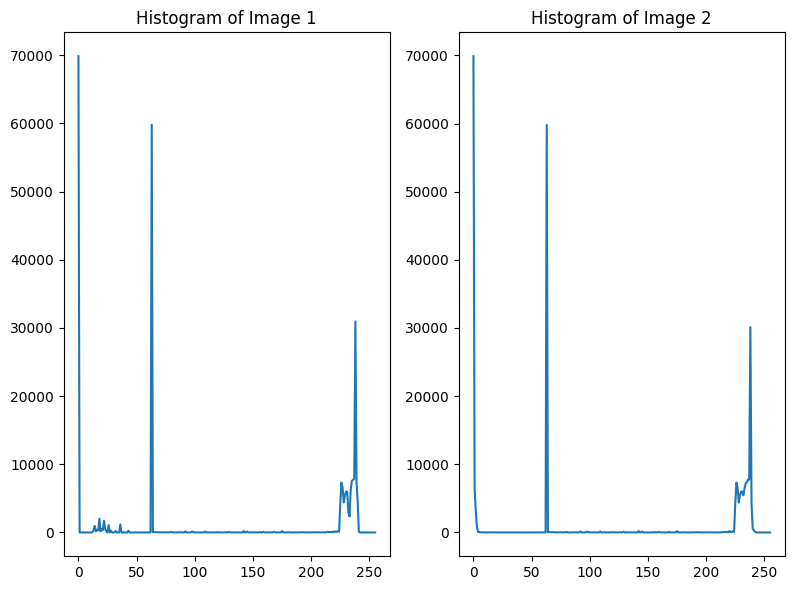

HIST1 [69857     0     0     0     0     0     0     0     0     0     0     0
    49   295   968   187   368   298  2007   169   528   342  1732   501
   174     0  1082     0   245     9     0     0   221     0     0    11
  1166     0     0     0     0    11     0   250     0     1     0     2
     8     0     0     0     3     0     4     0     3     4     0     0
     0     0     2 59783    31    97    30    13    49    15    21    20
    10    20    13    38    11    11    13    28    81    11     0    15
     8    17     7    33    22    17    15     4   163     5     9    18
     5    72   135     9    17     3     3    23     2     4     7     2
    11   142     4     7    13    14     9     2     5     4     7    43
     6    14    26    15     6     1    39     8    21   100     8    10
     2    12    10     6     3    20     1     5    14     6   215     2
     7   135     8    10    10     2    19     5     4    22     5    14
    53     7     7    91     4    15    20   

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
epsilon = 1e-10

def chi_squared_distance(hist1, hist2):
    # Compute the Chi-Squared distance
    chi_squared = np.sum((hist1 - hist2)**2 / hist2 + epsilon)
    return chi_squared

# Load and preprocess two different images
image1 = cv2.imread('Stego-pvd-dataset\\train\\cleanTrain\\00001.png', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('Stego-pvd-dataset\\train\\stegoTrain\\00001x.png', cv2.IMREAD_GRAYSCALE)

# Calculate histograms of pixel intensities for both images
hist1, _ = np.histogram(image1.ravel(), bins=256, range=(0, 255))
hist2, _ = np.histogram(image2.ravel(), bins=256, range=(0, 255))

# Normalize histograms to have the same sum (optional but recommended)
#hist1 = hist1 / np.sum(hist1)
#hist2 = hist2 / np.sum(hist2)

# Compute the Chi-Squared distance between the histograms
chi_squared = chi_squared_distance(hist1, hist2)

# Plot the histograms and Chi-Squared distance
plt.figure(figsize=(12, 6))

# Plot histogram of image 1
plt.subplot(1, 3, 1)
plt.title('Histogram of Image 1')
plt.plot(hist1)

# Plot histogram of image 2
plt.subplot(1, 3, 2)
plt.title('Histogram of Image 2')
plt.plot(hist2)

# Plot Chi-Squared distance
#plt.subplot(1, 3, 3)
#plt.title('Chi-Squared Distance: {:.2f}'.format(chi_squared))
#plt.bar([0, 1], [chi_squared, 0], tick_label=['Distance', ''])

plt.tight_layout()
plt.show()

print("HIST1",hist1)
print("HIST2",hist2)
print("CHI_SQUARED",chi_squared)


In [2]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [3]:
pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 660.6 kB/s eta 0:00:59
    --------------------------------------- 0.5/38.6 MB 5.4 MB/s eta 0:00:07
   - -------------------------------------- 1.4/38.6 MB 10.9 MB/s eta 0:00:04
   --- ------------------------------------ 3.5/38.6 MB 18.8 MB/s eta 0:00:02
   ------ --------------------------------- 5.9/38.6 MB 25.1 MB/s eta 0:00:02
   -------- ------------------------------- 8.3/38.6 MB 31.1 MB/s eta 0:00:01
   ----------- ---------------------------- 11.1/38.6 MB 46.7 MB/s eta 0:00:01
   ------------ --------------------------- 12.5/38.6 MB 46.7 MB/s eta 0:00:01
   --------------- ------------------------ 15.0/38.6 MB 54.7 MB/s eta 0:00:01
   ------------------ --------------------- 17.7/38.6 MB 54.7 MB/s eta 0:00:01
   -------------------- ------------------- 20.2/38.6 MB 50.1 MB/s eta 0:00:

In [9]:
pip install opencv-contrib-python


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Dupuju\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\cv2\\cv2.pyd'
Check the permissions.




   ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.3 MB 667.8 kB/s eta 0:01:08
   ---------------------------------------- 0.4/45.3 MB 4.5 MB/s eta 0:00:10
    --------------------------------------- 1.1/45.3 MB 7.6 MB/s eta 0:00:06
   - -------------------------------------- 1.7/45.3 MB 9.2 MB/s eta 0:00:05
   -- ------------------------------------- 2.6/45.3 MB 10.9 MB/s eta 0:00:04
   --- ------------------------------------ 3.7/45.3 MB 12.6 MB/s eta 0:00:04
   ---- ----------------------------------- 4.8/45.3 MB 14.1 MB/s eta 0:00:03
   ----- ---------------------------------- 6.1/45.3 MB 16.2 MB/s eta 0:00:03
   ------ --------------------------------- 7.3/45.3 MB 16.8 MB/s eta 0:00:03
   -------- ------------------------------- 9.3/45.3 MB 19.2 MB/s eta 0:00:02
   --------- ------------------------------ 11.1/45.3 MB 26.2 MB/s eta 0:00:02
  